In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


In [2]:
df = pd.read_csv('../other/frac_merge_peak.csv')


In [3]:
X = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing', u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft']]
X_primary = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Perfs/Cluster', u'Fluid_Bbls', u'Prop_Lbs']]
X_secondary = df[[u'Cluster_Spacing', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft']]
y = df[[u'OIL_Peak']]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Text yticklabel objects>)

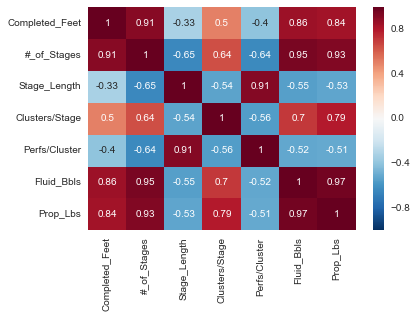

In [4]:
sns.heatmap(X_primary.corr(), annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


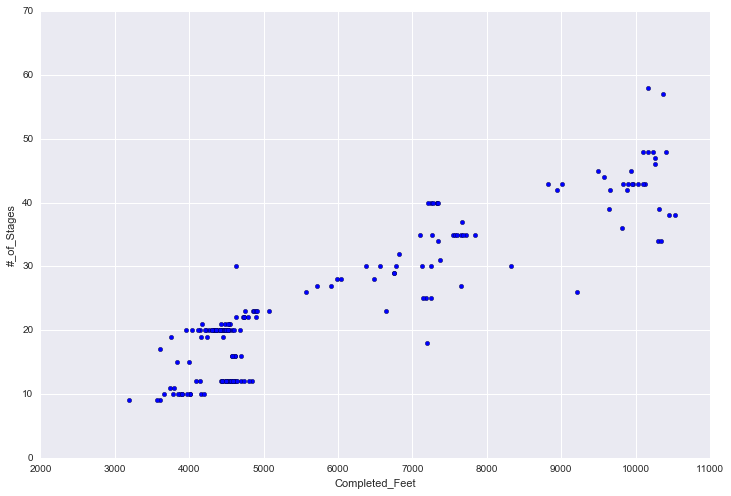

In [5]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Completed_Feet'], X['#_of_Stages'])
ax.set_xlabel('Completed_Feet')
ax.set_ylabel('#_of_Stages')


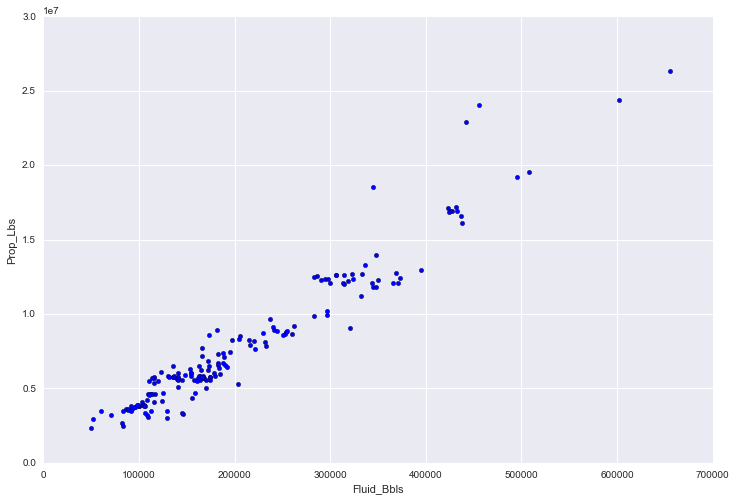

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Fluid_Bbls'], X['Prop_Lbs'])
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('Prop_Lbs')


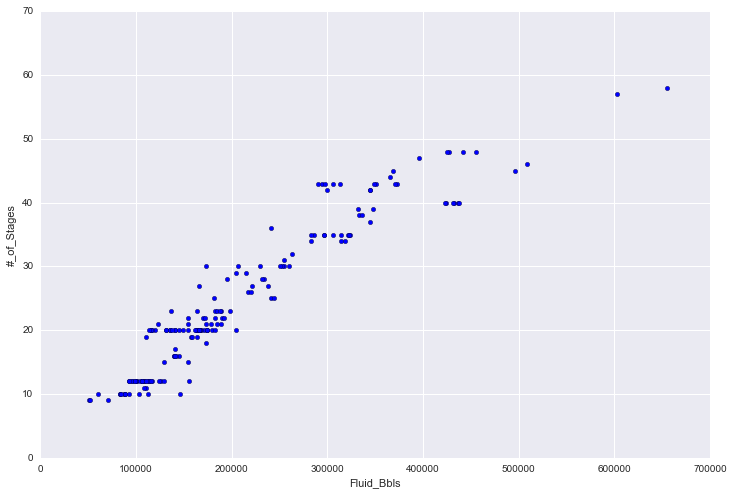

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Fluid_Bbls'], X['#_of_Stages'])
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('#_of_Stages')


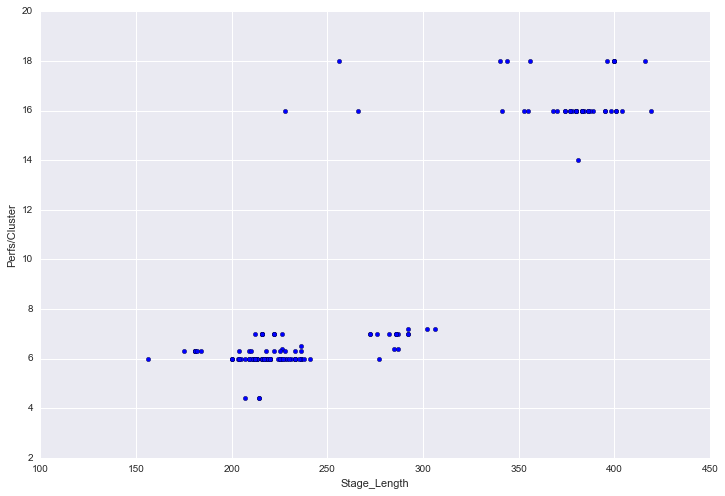

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X['Stage_Length'], X['Perfs/Cluster'])
ax.set_xlabel('Stage_Length')
ax.set_ylabel('Perfs/Cluster')


In [9]:
# X_mod1 = sm.add_constant(X_primary)
model = sm.OLS(y, X_primary)
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     222.3
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           2.23e-82
Time:                        09:05:41   Log-Likelihood:                -1202.8
No. Observations:                 178   AIC:                             2420.
Df Residuals:                     171   BIC:                             2442.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Completed_Feet     0.0032      0.030      0.

In [10]:
# X_mod2 = sm.add_constant(X_secondary)
model = sm.OLS(y, X_secondary)
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     97.67
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           1.63e-76
Time:                        09:05:41   Log-Likelihood:                -1187.6
No. Observations:                 178   AIC:                             2411.
Df Residuals:                     160   BIC:                             2468.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Cluster_Spacing       4.6299      3.86

In [11]:
# X_mod3 = sm.add_constant(X)
model = sm.OLS(y, X)
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     80.08
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           4.70e-75
Time:                        09:05:41   Log-Likelihood:                -1173.2
No. Observations:                 178   AIC:                             2396.
Df Residuals:                     153   BIC:                             2476.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Completed_Feet        0.0725      0.05

In [15]:
X.columns

Index([u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage',
       u'Cluster_Spacing', u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft',
       u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft',
       u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc',
       u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster',
       u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft',
       u'5"_SIP/Ft'],
      dtype='object')

In [29]:
# X_RFE = df[[u'Rate/Ft', u'ISIP/Ft', u'5"_SIP/Ft',  u'Avg_Prop_Conc', u'Perfs/Cluster', u'Rate/Perf', u'Rate/Cluster', 
#             u'Clusters/Stage', u'Max_Rate', u'Max_Prop_Conc', u'Avg_Rate', u'#_of_Stages', u'Cluster_Spacing',
#            u'Stage_Length', u'Fluid_Gal/Ft', u'Completed_Feet', u'Fluid_Gal/Ft', u'Avg_Pressure', u'Prop_Lbs/Ft',
#            u'Prop_Lbs/Perf', u'Max_Pressure', u'Prop_Lbs/Cluster', u'Fluid_Gal/Cluster', u'Fluid_Bbls', u'Prop_Lbs']]
X_RFE = df[[u'Rate/Ft', u'ISIP/Ft', u'5"_SIP/Ft',  u'Avg_Prop_Conc', u'Perfs/Cluster', u'Rate/Perf', u'Rate/Cluster', 
            u'Clusters/Stage', u'Max_Rate', u'Max_Prop_Conc', u'Avg_Rate', u'#_of_Stages', u'Cluster_Spacing',
           u'Stage_Length', u'Fluid_Gal/Ft']]


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Text yticklabel objects>)

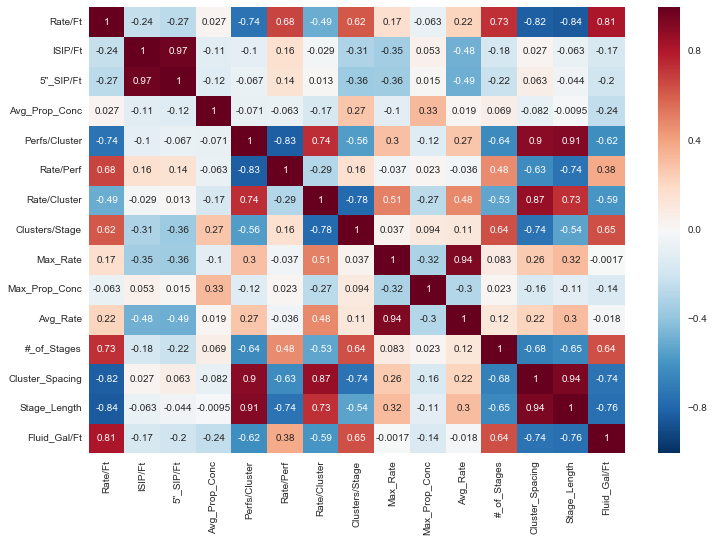

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(X_RFE.corr(), annot=True, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [14]:
# X_mod4 = sm.add_constant(X_uncorr)
model = sm.OLS(y, X_uncorr)
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     348.3
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           6.96e-82
Time:                        09:05:42   Log-Likelihood:                -1213.0
No. Observations:                 178   AIC:                             2434.
Df Residuals:                     174   BIC:                             2447.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Completed_Feet     0.0665      0.016      4.